# 201600779 김영민

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from tqdm import tqdm
import cv2
import os

In [2]:
np.random.seed(42)

# 신경망 클래스의 정의(은닉계층 하나)

In [3]:

class neuralNetwork:
    
    #신경망 초기화하기
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        self.inodes=inputnodes
        self.hnodes=hiddennodes
        self.onodes=outputnodes
        
        '''
        가중치 행렬 wih와 who
        배열 내 가중치는 w_i_j로 표기, 노드 i에서 다음 계층의 노드 j로 연결됨을 의미
        w11 w21
        w12 w22 등'''
        self.wih=np.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))   #정규분포로 더욱 정교한 가중치 설정
        self.who=np.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))
        
        #학습률
        self.lr=learningrate
        
        #활성화 함수로 시그모이드 함수를 이용
        def sigmoid(x):
            return 1/(1+np.exp(-x))
        
        
        
        self.activation_function = lambda x: sigmoid(x)
            
        pass
    #신경망 학습시키기
    def train(self, inputs_list,targets_list):
        #입력 리스트를 2차원의 행렬로 반환
        inputs=np.array(inputs_list,ndmin=2).T
        targets=np.array(targets_list,ndmin=2).T
        
        #은닉 계층으로 들어오는 신호를 계산
        hidden_inputs=np.dot(self.wih,inputs)
        #은닉 계층에서 나가는 신호를 계산
        hidden_outputs=self.activation_function(hidden_inputs)
        #최종 출력 계층으로 들어오는 신호를 계산
        final_inputs=np.dot(self.who,hidden_outputs)
        #최종 출력 계층에서 나가는 신호를 계산
        final_outputs=self.activation_function(final_inputs)
        
        #출력 계층의 오차는(실제값-계산값)
        output_errors = targets-final_outputs
        #은닉 계층의 오차는 가중치에 의해 나뉜 출력 계층의 오차들을 재조합해서 계산
        hidden_errors = np.dot(self.who.T,output_errors)
        
        #은닉 계층과 출력 계층 간의 가중치 업데이트
        self.who+= self.lr*np.dot((output_errors*final_outputs*(1.0-final_outputs)),np.transpose(hidden_outputs))
        
        #입력 계층과 은닉 계층 간의 가중치 업데이트
        self.wih+= self.lr*np.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)),np.transpose(inputs))
        
        pass
    
    #신경망 질의하기
    def query(self, input_list):
        
        #입력 리스트를 2차원 행렬로 변환
        inputs=np.array(input_list, ndmin=2).T
        
        #은닉 계층에서 들어오는 신호를 계산
        hidden_inputs=np.dot(self.wih,inputs)
        #은닉 계층에서 나가는 신호를 계산
        hidden_outputs=self.activation_function(hidden_inputs)
        #최종 출력 계층으로 들어오는 신호를 계산
        final_inputs=np.dot(self.who,hidden_outputs)
        #최종 출력 계층에서 나가는 신호를 계산
        final_outputs=self.activation_function(final_inputs)
        
        return final_outputs

# 신경망 클래스의 정의(은닉계층2개)

In [4]:

class neuralNetwork2:
    
    #신경망 초기화하기
    def __init__(self,inputnodes,hiddennodes,hiddennodes2,outputnodes,learningrate):
        self.inodes=inputnodes
        self.hnodes=hiddennodes
        self.hnodes2=hiddennodes2
        self.onodes=outputnodes
        
        '''
        가중치 행렬 wih와 who
        배열 내 가중치는 w_i_j로 표기, 노드 i에서 다음 계층의 노드 j로 연결됨을 의미
        w11 w21
        w12 w22 등'''
        self.wih=np.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))   #정규분포로 더욱 정교한 가중치 설정
        self.who=np.random.normal(0.0,pow(self.hnodes2,-0.5),(self.hnodes2,self.hnodes))
        self.who2=np.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes2))
        
        #학습률
        self.lr=learningrate
        
        #활성화 함수로 시그모이드 함수를 이용
        def sigmoid(x):
            return 1/(1+np.exp(-x))
        
        
        
        self.activation_function = lambda x: sigmoid(x)
            
        pass
    #신경망 학습시키기
    def train(self, inputs_list,targets_list):
        #입력 리스트를 2차원의 행렬로 반환
        inputs=np.array(inputs_list,ndmin=2).T
        targets=np.array(targets_list,ndmin=2).T
        
        #은닉 계층으로 들어오는 신호를 계산
        hidden_inputs=np.dot(self.wih,inputs)
        #은닉 계층에서 나가는 신호를 계산
        hidden_outputs=self.activation_function(hidden_inputs)
        
        # 은닉 계층2로 받는 신호 계산
        hidden_inputs2 = np.dot(self.who,hidden_outputs)
        #은닉 계층2에서 나가는 신호 계산
        hidden_outputs2 = self.activation_function(hidden_inputs2)
        
        #최종 출력 계층으로 들어오는 신호를 계산
        final_inputs=np.dot(self.who2,hidden_outputs2)
        #최종 출력 계층에서 나가는 신호를 계산
        final_outputs=self.activation_function(final_inputs)
        
        #출력 계층의 오차는(실제값-계산값)
        output_errors = targets-final_outputs
        #은닉 계층의 오차는 가중치에 의해 나뉜 출력 계층의 오차들을 재조합해서 계산
        hidden_errors2 = np.dot(self.who2.T,output_errors)
        hidden_errors = np.dot(self.who.T,hidden_errors2)
        
        
        #은닉 계층과 출력 계층 간의 가중치 업데이트
        self.who2+= self.lr*np.dot((output_errors*final_outputs*(1.0-final_outputs)),np.transpose(hidden_outputs2))
        
        #은닉 계층2와 은닉 계층 간의  가중치 업데이트
        self.who += self.lr*np.dot((hidden_errors2*hidden_outputs2*(1.0-hidden_outputs2)),np.transpose(hidden_outputs))
        
        #입력 계층과 은닉 계층 간의 가중치 업데이트
        self.wih+= self.lr*np.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)),np.transpose(inputs))
        
        pass
    
    #신경망 질의하기
    def query(self, input_list):
        
        #입력 리스트를 2차원 행렬로 변환
        inputs=np.array(input_list, ndmin=2).T
        
        #은닉 계층에서 들어오는 신호를 계산
        hidden_inputs=np.dot(self.wih,inputs)
        #은닉 계층에서 나가는 신호를 계산
        hidden_outputs=self.activation_function(hidden_inputs)
        
        # 은닉 계층2로 받는 신호 계산
        hidden_inputs2 = np.dot(self.who,hidden_outputs)
        #은닉 계층2에서 나가는 신호 계산
        hidden_outputs2 = self.activation_function(hidden_inputs2)
        
        #최종 출력 계층으로 들어오는 신호를 계산
        final_inputs=np.dot(self.who2,hidden_outputs2)
        #최종 출력 계층에서 나가는 신호를 계산
        final_outputs=self.activation_function(final_inputs)
        
        return final_outputs

In [5]:
training_data_file = open("mnist_dataset/mnist_train.csv",'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [6]:
ls = os.listdir('my_own_images')
test_data_list = []
label = []
for i in ls:
    label.append(i.split('.')[0][-1])
    img = cv2.imread('my_own_images/'+i,cv2.IMREAD_GRAYSCALE)
    img = img.reshape(-1)
    test_data_list.append(img)
labels = list(map(lambda x: int(x),label))
labels

[2, 3, 4, 5, 6, 3, 6]

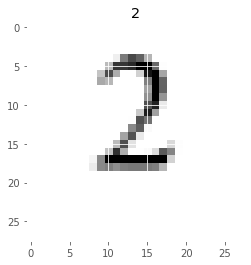

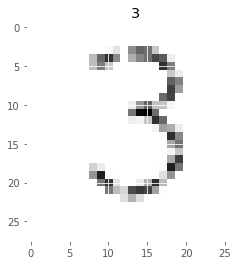

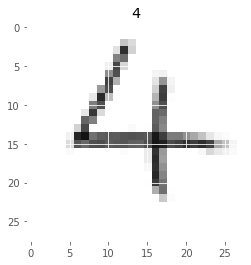

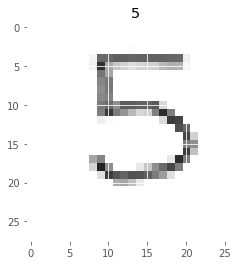

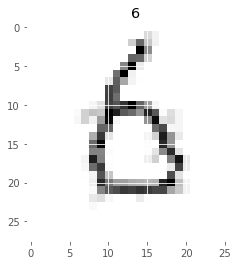

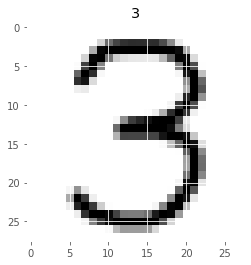

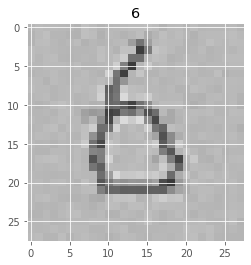

In [7]:
import matplotlib.pyplot as plt
def show_img(img):
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
#     plt.imshow(img)
    plt.show()
for i ,l in zip(ls,labels):
    img = cv2.imread('my_own_images/'+i)
    plt.title(str(l))
    show_img(img)

# jupyter Version

In [10]:
input_nodes = 784
hidden_nodes = 100
hidden_nodes2 = 200
output_nodes = 10
learning_rate = 0.01
epochs = 5

In [11]:
def my_own_image(model,input_nodes,hidden_nodes,hidden_nodes2,output_nodes,learning_rate,epochs):
    
    if model == 'n2':
        n=neuralNetwork2(input_nodes,hidden_nodes,hidden_nodes2,output_nodes,learning_rate)
    if model == 'n1':
        n=neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)
    for e in tqdm(range(epochs)):
        for record in training_data_list:
            all_values = record.split(',')
            inputs = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
            targets=np.zeros(output_nodes)+0.01
            targets[int(all_values[0])] = 0.99
            n.train(inputs,targets)
            pass
    scorecard = []

    for record,lab in zip(test_data_list,labels):
        correct_label = lab
        inputs = (np.asfarray(record)/255.0*0.99)+0.01
        outputs = n.query(inputs) # 신경망에 물어보는 것 train 값에 기초해서 얘 뭐나와? 이런거

        label=np.argmax(outputs)
        if label == correct_label:
            scorecard.append(1)
        else:
            scorecard.append(0)
    scorecard_array=np.asarray(scorecard)
    acc = sum(scorecard_array)/len(scorecard_array) * 100
    return 'Accuracy : %.2f%%'%acc
n1_acc = my_own_image('n1',input_nodes,hidden_nodes,hidden_nodes2,output_nodes,learning_rate,epochs)
n2_acc = my_own_image('n2',input_nodes,hidden_nodes,hidden_nodes2,output_nodes,learning_rate,epochs)
print(f'1 Hidden Layer Acc : {n1_acc}')
print(f'2 Hidden Layer Acc : {n2_acc}')

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:45<00:00, 21.03s/it]

1 Hidden Layer Acc : Accuracy : 0.00%
2 Hidden Layer Acc : Accuracy : 14.29%


---------------

# Python Version

In [ ]:
# import argparse
# def my_own_image(opt):
#     model,input_nodes,hidden_nodes,hidden_nodes2,output_nodes,learning_rate,epoch = opt.model,opt.input,opt.h1,opt.h2,opt.output,opt.lr,opt.epohcs
#     if model == 'n2':
#         n=neuralNetwork2(input_nodes,hidden_nodes,hidden_nodes2,output_nodes,learning_rate)
#     if model == 'n1':
#         n=neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)
#     for e in tqdm(range(epochs)):
#         for record in training_data_list:
#             all_values = record.split(',')
#             inputs = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
#             targets=np.zeros(output_nodes)+0.01
#             targets[int(all_values[0])] = 0.99
#             n.train(inputs,targets)
#             pass
#     scorecard = []

#     for record,lab in zip(test_data_list,labels):
#         correct_label = lab
#         inputs = (np.asfarray(record)/255.0*0.99)+0.01
#         outputs = n.query(inputs) # 신경망에 물어보는 것 train 값에 기초해서 얘 뭐나와? 이런거

#         label=np.argmax(outputs)
#         if label == correct_label:
#             scorecard.append(1)
#         else:
#             scorecard.append(0)
#     scorecard_array=np.asarray(scorecard)
#     acc = sum(scorecard_array)/len(scorecard_array) * 100
#     print('Accuracy : %.2f%%'%acc)
# if __name__ == '__main__':
#     parser = argparse.ArgumentParser()
#     parser.add_argument('--model', type=str, default='n2')
#     parser.add_argument('--input', type=int, default=784)
#     parser.add_argument('--h1', type=int,default = 100)
#     parser.add_argument('--h2', type=int,default = 100)
#     parser.add_argument('--output',type=int,default=10)
#     parser.add_argument('--lr',type=float,default=0.01)
#     parser.add_argument('--epochs',type=int,default = 10)
#     opt = parser.parse_args()
#     my_own_image(opt)

# 201600779 김영민